In [136]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv')

In [137]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [138]:
df.shape

(1303, 12)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [140]:
df.duplicated().sum()

0

### Preprocessing

In [141]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df['Ram']=df['Ram'].apply(lambda x: x.replace('GB','')).astype(int)
df['Weight']=df['Weight'].apply(lambda x:x.replace('kg' ,'')).astype(float)

### EDA

D:\r\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

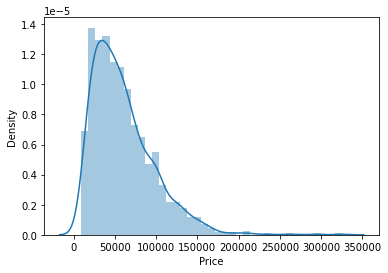

In [142]:
import seaborn as sns
sns.distplot(df['Price'])

<AxesSubplot:>

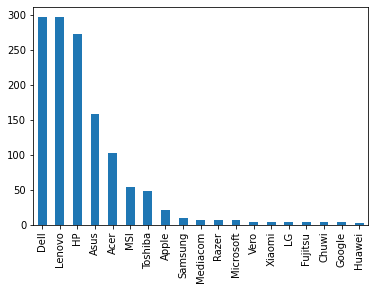

In [143]:
df['Company'].value_counts().plot(kind='bar')

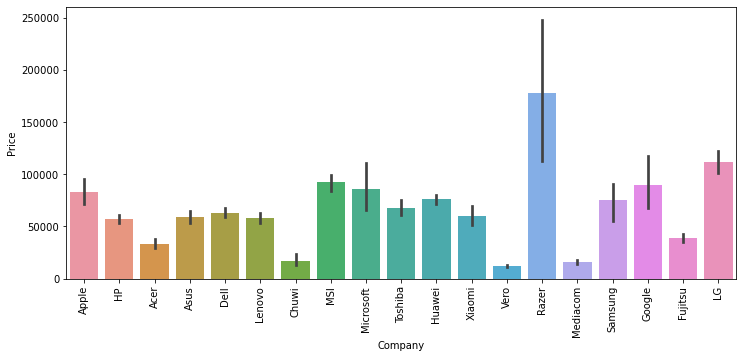

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation ='vertical');

<AxesSubplot:>

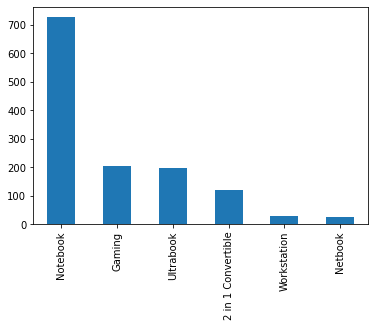

In [145]:
df['TypeName'].value_counts().plot(kind='bar')

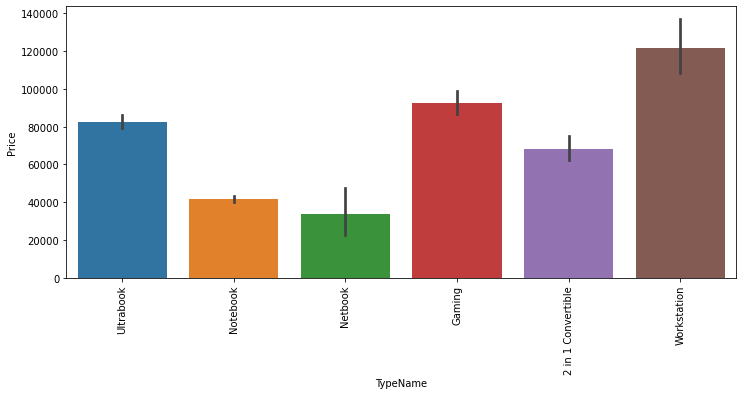

In [146]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation ='vertical');

D:\r\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

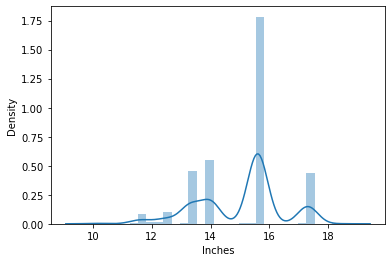

In [147]:
sns.distplot(df['Inches'])

In [148]:
df ['TouchScreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

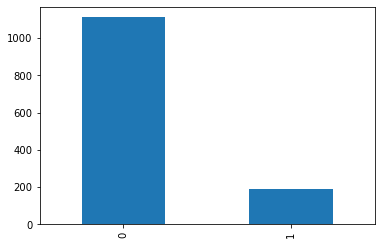

In [149]:
df['TouchScreen'].value_counts().plot(kind='bar')

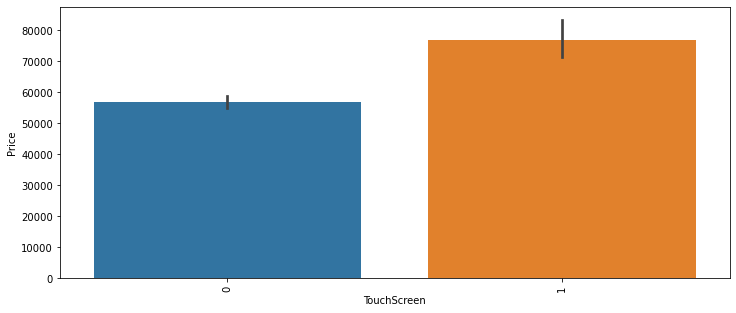

In [150]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.xticks(rotation ='vertical');

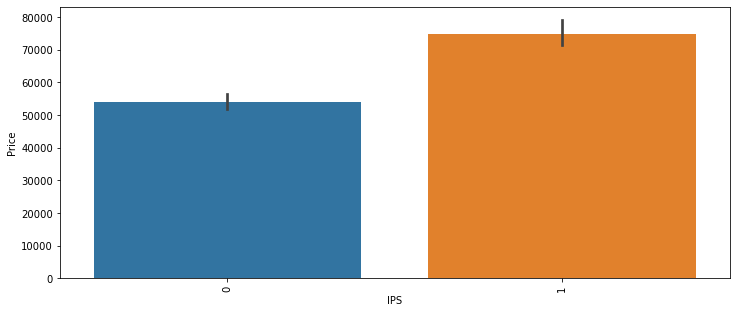

In [151]:
df ['IPS']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
plt.figure(figsize=(12,5))
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation ='vertical');

In [152]:
new =df['ScreenResolution'].str.split('x',n=1,expand=True)

In [153]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [154]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [155]:
df['X_res']=df['X_res'].astype(int)
df['Y_res']=df['Y_res'].astype(int)

In [156]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [157]:
#pixels per inch
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [158]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [159]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Core i5 7200U 2.7GHz                1
Intel Core i5 6260U 1.8GHz                1
AMD A6-Series 9220 2.9GHz                 1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Name: Cpu, Length: 118, dtype: int64

In [160]:
df['cpu_name'] = df['Cpu'].apply(lambda x:' '.join( x.split()[0:3]))

In [161]:
def fetch_prcessor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else :
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [162]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_prcessor)

<AxesSubplot:>

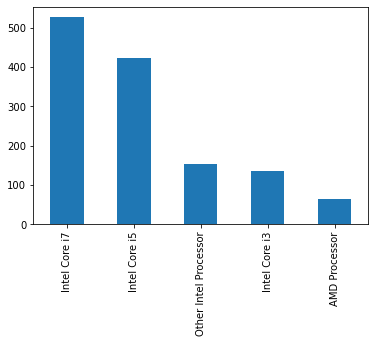

In [163]:
df['cpu_brand'].value_counts().plot(kind = 'bar')

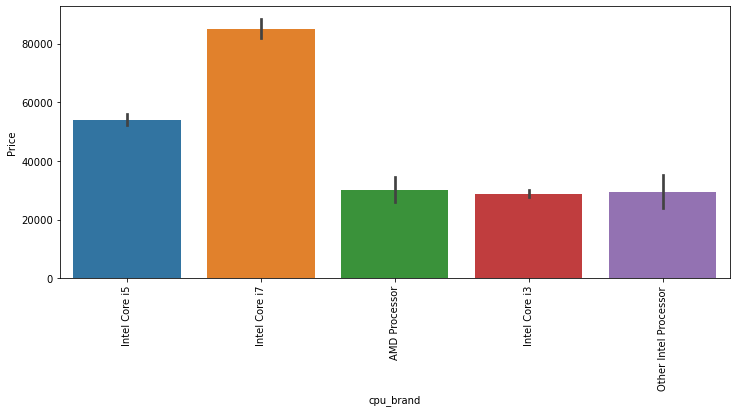

In [164]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['cpu_brand'],y=df['Price'])
plt.xticks(rotation ='vertical');

In [165]:
df.drop(columns=['Cpu','cpu_name'],inplace=True)

In [166]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [167]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [168]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


<ipython-input-168-10829db803de>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-168-10829db803de>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [169]:
df.drop(columns=['Memory'],inplace=True)

In [170]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [171]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [172]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [173]:
df['gpu_brand_name']=df['Gpu'].apply(lambda x : x.split()[0])

In [174]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_brand,HDD,SSD,gpu_brand_name
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel


<AxesSubplot:>

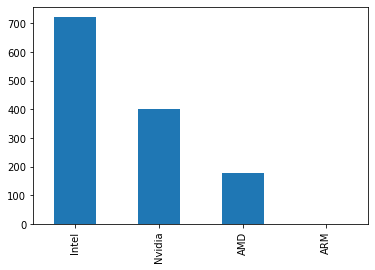

In [175]:
df['gpu_brand_name'].value_counts().plot(kind='bar')

In [176]:
df= df[df['gpu_brand_name']!='ARM']

In [177]:
df['gpu_brand_name'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

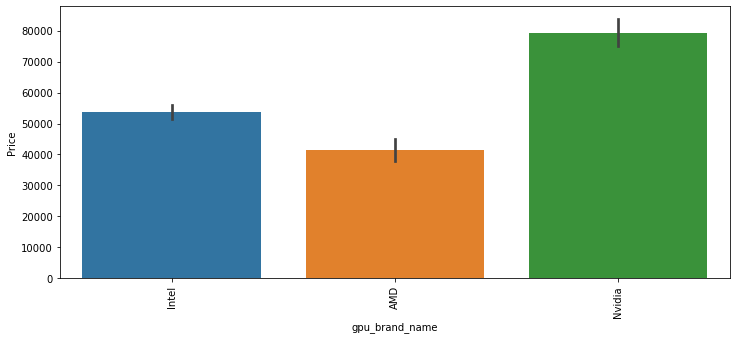

In [178]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['gpu_brand_name'],y=df['Price'])
plt.xticks(rotation ='vertical');

In [179]:
df.drop(columns=['Gpu'],inplace=True)

In [180]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [181]:
def cat_os(inp):
    if inp == 'Windows 10' or  inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'       

In [182]:
df['os'] =df['OpSys'].apply(cat_os)

In [183]:
df.drop(columns=['OpSys'],inplace=True)

In [184]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,cpu_brand,HDD,SSD,gpu_brand_name,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


<AxesSubplot:>

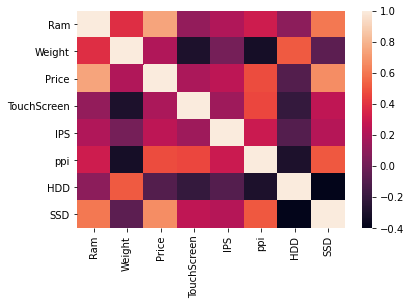

In [185]:
sns.heatmap(df.corr())

D:\r\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

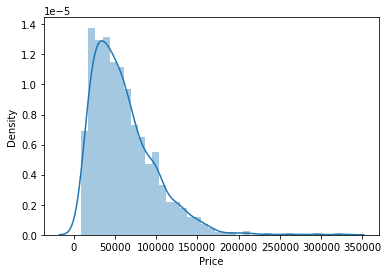

In [187]:
sns.distplot(df['Price'])

#### Since target column is skewed, so we can apply some transformation on it.

D:\r\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

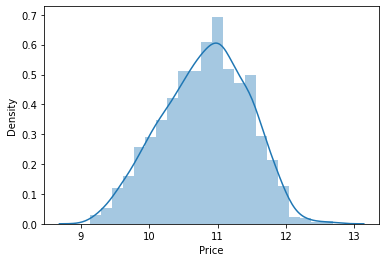

In [188]:
sns.distplot(np.log(df['Price']))

In [190]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [194]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## LR

In [198]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])], remainder = 'passthrough')


step2 = LinearRegression()

pipe = Pipeline(steps = [('step1' , step1) , ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ',r2_score(y_test,y_pred) )
print('MAE: ',mean_absolute_error(y_test,y_pred))

R2 Score:  0.8073277450155156
MAE:  0.2101782795301911


## Ridge Regression

In [199]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331033739459
MAE 0.20926802210371429


## Lasso Regression

In [200]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853947620582
MAE 0.21114361575113455


## Random Forest

In [201]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


# Exporting Model

In [202]:
import pickle
pickle.dump(df, open('df.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))